In [5]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import time
import datetime
import json
import requests
from scipy.stats import linregress

In [6]:
# Import API key
from config import api_key 

# citipy to determine city based on latitude and longitude
from citipy import citipy

# Output
output_data_file = "WeatherPy_output.csv"

# Range of Latitudes and Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
 # Create lists to hold response data for lat_lngs and cities
lat_lngs = []
cities = []
    
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)

# Numbers of City
len(cities)

622

In [8]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

c_id= []
name = []
country = []
long = []
latt = []
cloudiness= []
date= []
humidity= []
max_temp = []
wind_speed = []
weather_json = {}

try:
    url = "http://api.openweathermap.org/data/2.5/weather?"

    for city in cities:
        query_url = url + "&q=" + city + "&APPID=" + api_key 
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        
        c_id.append(str(weather_json['id']))
        name.append(str(weather_json['name']))
        country.append(str(weather_json['sys']['country']))
        long.append(float(round(weather_json['coord']['lon'],2)))
        latt.append(float(round(weather_json['coord']['lat'],2)))
        cloudiness.append(float(weather_json['clouds']['all']))
        date.append(str(datetime.datetime.fromtimestamp(weather_json['dt']).strftime("%A, %d. %B %Y %I:%M%p")))
        humidity.append(float(weather_json['main']['humidity']))
        max_temp.append((1.8*(weather_json['main']['temp_max'] - 273) + 32))
        wind_speed.append(float(weather_json['wind']['speed']))
        
except KeyError:
    
    pass

print(query_url)


http://api.openweathermap.org/data/2.5/weather?&q=formoso do araguaia&APPID=c1f1e3f8740ef5ed1f19462faa9b3232


In [9]:
# Create DataFrame
weather_list_df = pd.DataFrame({'City ID':c_id,'City':name,'Country':country,'Lng':long,'Lat':latt, 'Cloudiness':cloudiness,  'Humidity': humidity, 'Date': date, 'Max Temp':max_temp, 'Wind Speed':wind_speed})
weather_list_df.to_csv(output_data_file, index = False)
weather_list_df

,City ID,City,Country,Lng,Lat,Cloudiness,Humidity,Date,Max Temp,Wind Speed
0,5882953,Aklavik,CA,-135.01,68.22,97.0,77.0,"Saturday, 13. February 2021 05:33AM",-3.730,1.03
1,2892786,Karlstadt am Main,DE,9.77,49.96,0.0,67.0,"Saturday, 13. February 2021 05:33AM",27.266,4.95
2,4030556,Rikitea,PF,-134.97,-23.12,44.0,78.0,"Saturday, 13. February 2021 05:33AM",79.160,5.97


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Lat_MT.png'

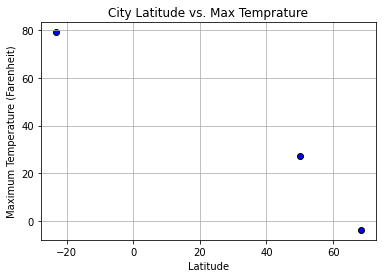

In [10]:
# Convert data to DataFrame
# Latitude vs. Temperature Plot
plt.scatter(weather_list_df['Lat'], weather_list_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,120)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temprature")
plt.ylabel("Maximum Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('output_data/Lat_MT.png')